In [142]:
# MNIST데이터 셋을 사용 한다.
# 미국 고등학생과 인구조사국 직원들이 손으로 쓴
# 70000개의 작은 숫자 이미지

In [143]:
from sklearn.datasets import fetch_openml
# 딕셔너리 구조와 비슷
# 데이터셋을 분리할 때 섞어져 있는 데이터셋을 가져오고싶다
# mnist_784는 이미 섞어져 있는 데이터셋 이기에 코드로 다시 섞을 필요가 없다.
mnist = fetch_openml('mnist_784',version=1,as_frame=False)
mnist.keys()

C:\Users\502\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [144]:
# 28 * 28 픽셀 이미지 784[0~783]
# 0~225, 흑백이미지 
x,y = mnist['data'],mnist['target']
x.shape

(70000, 784)

In [145]:
y

array(['5',
       '0',
       '4',
       ...,
       '4',
       '5',
       '6'],
      dtype=object)

In [146]:
y.shape

(70000,)

In [147]:
len(y)

70000

In [160]:
# 훈련세트와 테스트 세트로 나누기
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000],y[60000:]
x_train.shape

(60000, 784)

In [161]:
# 타이타닉 1,0
# 이진 분류기 훈련
# 5와 5가 아니다 두 개의 클래스를 구분할 수 있는 이진분류 훈련

In [162]:
# 타겟(label)값을 변경
# 5는 True, 다른 숫자는 false
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)
y_train_5

array([ True,
       False,
       False,
       ...,
        True,
       False,
       False])

In [163]:
# 사이킷런 SGDClassifier 클래스를 사용해 훈련
# 확률적 경사 하강법 알고리즘
# 분류 학습에 많이 쓴다.
# 큰 데이터셋에 효율적으로 처리하는 장점

In [164]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [165]:
sgd_clf.predict([some_digit])

array([ True])

In [166]:
y[0]

5

In [167]:
# 성능 측정

In [168]:
# 교차 검증을 사용한 정확도 측정
# cross_val_score()
# 3개의 폴드로 나눈다.
# 1, 2, 3폴드, 1, 2로 학습한 후 3폴드로 정확도 측정 - 점수, 2, 3 학습한 후 1폴드로 정확도 측정 - 점수...
# 총 3번 정확도 측정
# K-겹 교차 검증
# 과대 적합

In [169]:
# 몇겹으로 검증 할 건지 옵션 cv=?
# 원하는 평가지표를 넣기위해 scoring 파라미터에 정확도를 뜻하는 accuracy를 넣는다.
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy',verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.4s finished


array([0.95035,
       0.96035,
       0.9604 ])

In [170]:
# 이진 분류는 실제 양성클래스의 수에 따라 성능 점수가 다르다.
# 5아님으로 분류를 하게 되면 점수가 높아 진다.

In [171]:
# 모든 이미지를 '5가 아님' 클래스로 분류하는 더미 분류기를 만든다.
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [172]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125,
       0.90855,
       0.90915])

In [173]:
# 정확도는 분류기의 성능 측정 지표로 선호하지 않는다.

In [174]:
# 오차 행렬
# 분류기의 성능을 평가하는 더 좋은 방법은 오차 행렬이다.
# 클래스 A의 생플이 클래스 B로 분류된 횟수를 세는 것
# 예)5샘플을 5클래스로 분류한 횟수
# 5샘플을 5아님으로 분류한 횟수
# 5가 아닌 샘플을 5로 분류한 횟수

In [175]:
# 오차 행렬을 만들려면 실제 타겟과 비교할 수 있도록 먼저 예측값을 만든다.
# cross_val_predict()
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)
y_train_pred

array([ True,
       False,
       False,
       ...,
        True,
       False,
       False])

In [176]:
# confusion_matrix() 함수를 사용해 오차 행렬을 만든다.
# 타겟 클래스와 예측 클래스를 넣는다.
# (0,0) - 53892 : '5아님' 이미지를 정확히 5아님으로 분류한 수 - 진짜 음성(true negative)
# (0,1) - 687 : '5아님' 이미지를 '5'클래스로 잘못 분류한 수 - 거짓 양성(false positive)
# (1,0) - 1891 : '5'이미지를 '5아님' 클래스로 잘못 분류한 수 - 거짓 음성(false negative)
# (1,1) - 3530 : '5'이미지를 정확히 '5'클래스로 분류한 수 - 진짜 양성(true positive)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,
          687],
       [ 1891,
         3530]],
      dtype=int64)

In [177]:
# 완벽한 분류기의 오차 행렬
y_train_perfact_pred = y_train_5
confusion_matrix(y_train_5,y_train_perfact_pred)

array([[54579,
            0],
       [    0,
         5421]],
      dtype=int64)

In [178]:
# 정밀도와 재현율 - 분류기에 가장 많이 사용되는 요약된 지표
# 정밀도 = 진짜 양성 / (진짜양성+거짓양성)
# 재현율 = 진짜 양성 / (진짜양성+거짓음성)
# 정밀도는 정확하게 분류한 밀도
# 재현율은 진짜 양성 비율

In [179]:
# 정밀도와 재현율을 구하는 함수 제공
# 정밀도 구하기
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [180]:
# 재현율
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [181]:
# 다른 분류기와 성능 비교를 할 때에는 F1정수를 사용한다.
# F1정수는 정밀도와 재현율의 조화평균 점수

In [182]:
# F1점수를 계산하려면 f1_score()함수 사용
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [183]:
# 일반적으로는 f1점수로 성능 비교를 하지만
# 특수한 경우도 있다.
# 어린아이에게 안전한 동영상을 걸러내는 분류기를 훈련시킨다고 가정
# 정밀도가 중요하다
# 정밀도가 높으면 나쁜 동영상이 낄 확률이 적어 진다.
# 좋은 동영상도 입구컷이 될 확률이 높아진다.
# 재현율이 낮아 진다.
# 높은 정밀도, 낮은 재현율이 필요하다

# 감시 카메라를 통해 좀도둑을 잡아내는 분류기를 만든다.
# 재현율이 99%, 정확도가 30%만 되더라도 좋다.
# 경보가 잘못 울리더라도 거의 모든 좀도둑을 잡는다

# 둘다 모두 얻을 수는 없다.
# 정밀도를 올리면 재현율이 줄어 든다 반대도 마찬가지다.
# 이를 정밀도/재현율 트레이드오프라고 한다.

In [184]:
# 정밀도/재현율 트레이드오프
# SGDClassifier 알고리즘을 살펴 본다
# 어떤 이미지가 true,false -> [2000,-3000] -> 기준값(임계값) =>0
# 분류할 기준과 결정값 -> 임계값
# 인계값 조정을 통해 정밀도/재현율 트레이드 오프 가능

In [185]:
# 사이킷런에서 예측에 사용한 점수를 확인 가능
# 임계값은 직접 지정할 순 없다.
# decision_function()함수 호출하면 각 샘플의 점수를 얻는다.
y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [186]:
threshold =0
y_some_digit_pred = (y_score>threshold)
y_some_digit_pred

array([ True])

In [187]:
threshold =8000
y_some_digit_pred = (y_score>threshold)
y_some_digit_pred

array([False])

In [188]:
# 임계값을 높이면 재현율이 줄어 든다.

In [189]:
# 훈련 세트의 모든 샘플의 점수를 구한다.
# np.set_printoptions(threshold=10,linewidth=10)
y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method='decision_function')
y_scores

array([  1200.93051237,
       -26883.79202424,
       -33072.03475406,
       ...,
        13272.12718981,
        -7258.47203373,
       -16877.50840447])

In [190]:
# 가능한 모든 임곗값에 대해 정밀도와 재현율을 계산 해준다.
# precision_recall_curve()
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)
thresholds

array([-146348.56726174,
       -142300.00705404,
       -137588.97581744,
       ...,
         38871.26391927,
         42216.05562787,
         49441.43765905])

In [191]:
# 3개의 배열이 나온다.
precision_recall_curve(y_train_5,y_scores)

(array([0.09035   ,
        0.09035151,
        0.09035301,
        ...,
        1.        ,
        1.        ,
        1.        ]),
 array([1.00000000e+00,
        1.00000000e+00,
        1.00000000e+00,
        ...,
        3.68935621e-04,
        1.84467810e-04,
        0.00000000e+00]),
 array([-146348.56726174,
        -142300.00705404,
        -137588.97581744,
        ...,
          38871.26391927,
          42216.05562787,
          49441.43765905]))

In [192]:
len(thresholds),len(precisions),len(recalls)

(60000, 60001, 60001)

In [193]:
precisions[-1],recalls[-1]

(1.0, 0.0)

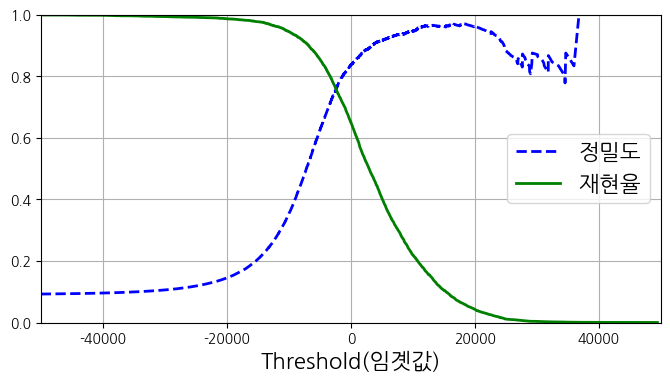

In [194]:
# 임곗값에 따른 정밀도와 재현율을 시각화
# 'b--' 는 파란색에 점선을 의미
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='정밀도',linewidth=2)
    plt.plot(thresholds,recalls[:-1],'g-',label='재현율',linewidth=2)
    plt.legend(loc='center right',fontsize=16)
    plt.xlabel('Threshold(임곗값)',fontsize=16)
    plt.grid(True)
    plt.axis([-50000,50000,0,1])
plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

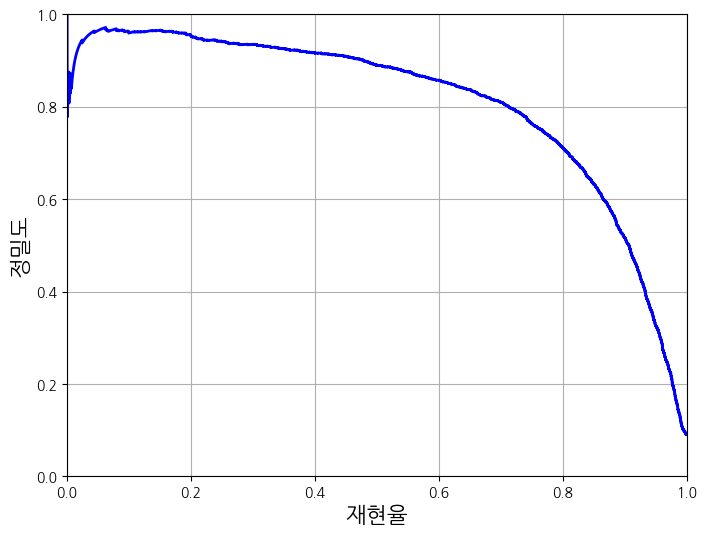

In [195]:
# 좋은 정밀도/재현율 트레이드오프를 선택하는 방법
# 재현율에 대한 정밀도 곡선을 그리는 것
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(recalls,precisions,'b-',linewidth=2)
    plt.xlabel('재현율',fontsize=16)
    plt.ylabel('정밀도',fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)
plt.figure(figsize=(8,6))
plot_precision_vs_recall(precisions,recalls)
plt.show()

In [196]:
# 정밀도가 90%를 달성하는 것이 목표라고 가정
# np.argmax() - 최댓값의 첫 번째 인덱스를 반환
threshold_90_precisions = thresholds[np.argmax(precisions>=0.90)]
threshold_90_precisions

3370.0194991439557

In [197]:
# 정확도 90%에 대한 예측
y_train_pred_90 = (y_scores>=threshold_90_precisions)
y_train_pred_90

array([False,
       False,
       False,
       ...,
        True,
       False,
       False])

In [198]:
# 예측에 대한 정밀도와 재현율을 확인
precision_score(y_train_5,y_train_pred_90),recall_score(y_train_5,y_train_pred_90)
# 아래 나오는 값은 (정밀도, 재현율) 값이다.

(0.9000345901072293, 0.4799852425751706)

In [199]:
#### ROC 곡선
# 수신기 조작 특성(ROC)
# ROC곡선은 거짓 양성 비율에 대한 진짜 양성 비율의 곡선
# ROC곡선은 재현율에 대한 1-특이도 그래프
# 진짜 음성 비율(TNR)을 특이도 라고 함

In [200]:
# ROC곡선을 그리려면 roc_curve() 함수를 사용
# 여러 임곗값에서 거짓양성비율(FPR)과 진짜양성비율(TPR)을 계산
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)
fpr

array([0.        ,
       0.        ,
       0.        ,
       ...,
       0.99937705,
       0.99937705,
       1.        ])

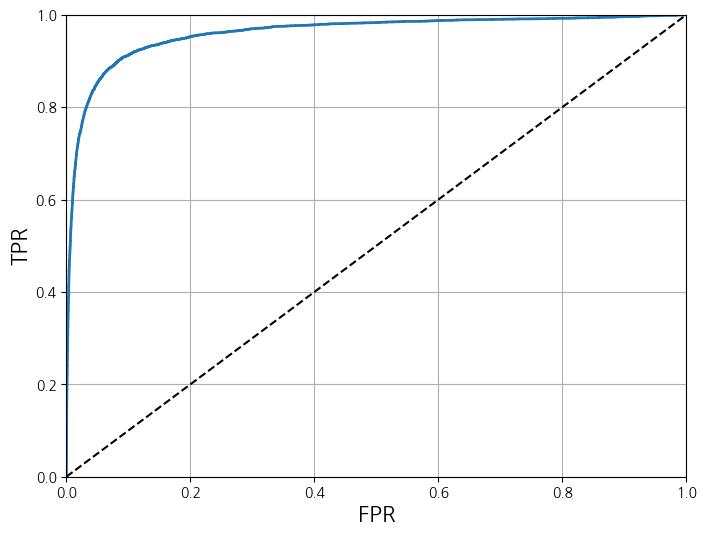

In [201]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    # 대각 점선
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR',fontsize=16)
    plt.ylabel('TPR',fontsize=16)
    plt.grid(True)
plt.figure(figsize=(8,6))
plot_roc_curve(fpr,tpr)
plt.show()

In [202]:
# TPR(진짜 양성 비율),재현율
# FPR(가짜 양상 비율)
# 트레이드오프가 발생
# 왼쪽 모서리로 선이 붙을 수록 좋은 모델이 된다.
# 좋은 분류기는 점선에서 최대한 멀리 떨어져 있어야 된다.
# 1. F1정수, 2. 정밀도/재현율 곡선(PR), 3. ROC곡선

In [203]:
# 일반적인 법칙
# 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때 = PR곡선이 유리
# 반대의 경우 ROC곡선

In [204]:
# 곡선 아래의 면적(AUC)을 측정하면 분류기준을 비교할 수 있다.
# 완벽한 분류기는 ROC의 AUC가 1, 완전한 랜덤 분류기는 0.5

In [205]:
# AUC 점수 구하기
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [206]:
# 랜덤포레스트 분류기를 훈련시켜 확률적경사하강법 분류기와 AUC점수를 비교

In [207]:
# 랜덤포레스트 분류기는 예를 들어 어떤 이미지가 5일 확률 - 70%
# predict_proba() 함수가 있다. - 샘플이 주어진 클래스에 속할 확률을 담은 배열을 반환
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
# random_state 랜덤시득 고정
# n_estimators 결정트리 개수 지정

y_probas_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

In [208]:
# 리스트의 두번째가 양성 클래스의 확률
y_probas_forest

array([[0.11,
        0.89],
       [0.99,
        0.01],
       [0.96,
        0.04],
       ...,
       [0.02,
        0.98],
       [0.92,
        0.08],
       [0.94,
        0.06]])

In [209]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0.89,
       0.01,
       0.04,
       ...,
       0.98,
       0.08,
       0.06])

In [210]:
fpr_forest,tpr_forest,thresholds_forest = roc_curve(y_train_5,y_scores_forest)

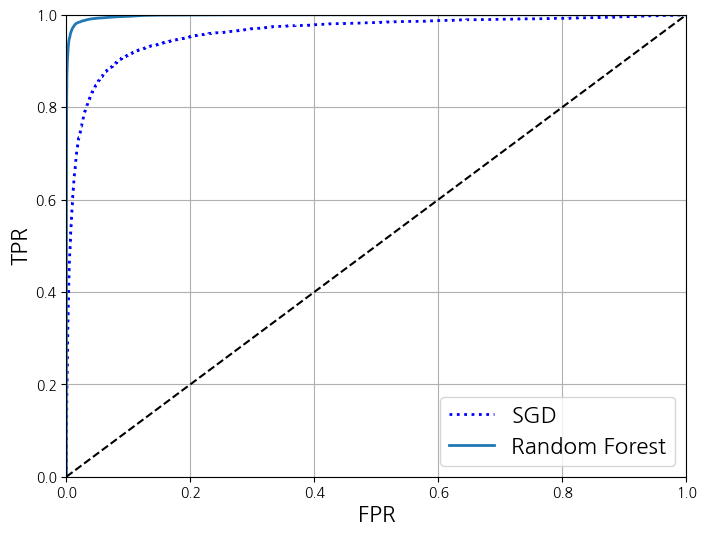

In [211]:
# 비교를 위해 첫번째 두번째 ROC곡선을 함께 그린다.
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,'b:',linewidth=2,label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right',fontsize=16)
plt.show()
# 아래 그래프에서 SGD보다 Random Forest가 더 왼쪽 모서리에 가깝기 때문에 Random Forest가 더 좋은 성능이다.

In [212]:
# 랜던포레스트가 더 좋다.
# AUC점수로도 비교
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [213]:
# 이진 분류기를 훈련시키는 방법
# 작업에 맞는 적절한 지표 선택 - 알고리즘 선택
# 교차 검증을 사용한 평가
# 요구 사항에 맞는 정밀도/재현율 트레이드 오프 선택
# ROC곡선과 ROC AUC점수를 사용해서 여러 모델을 비교

In [214]:
## 다중 분류
# 이진 분류 - 두 개의 클래스로 구별
# 다중 분류 - 둘 이상의 클래스로 구별
# 여러 개의 클래스를 직접 처리 - SGD, 랜덤포레스트, 나이브베이즈 등등
# 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법
# 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개를 훈련시켜
# 클래스가 10개인 숫자 이미지 분류 시스템 만들 수 있다.
# 이를 OvR(One-versus-the-Rest) 또는 OvA(One-versus-the-All)라고도 부른다

In [215]:
# 예를 들어 0과 1구별, 0과 2 구별.......9와 1 구별등과 같이
# 각 숫자의 조합마다 이진 분류기를 훈련시키는 기법
# 이를 OvO(One-versus-One)전략이라고 한다.
# 클래스가 N개라면 분류기가 N*(N-1)/2 개가 필요
# MNIST 문제에서는 45개의 분류기를 훈련시켜야 된다.

In [216]:
# 다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면
# 사이킷런이 알고리즘에 따라 자동으로 OvR또는 OvO를 선택해서 실행

In [217]:
# 이진분류 알고리즘 - 서포트 백터 머신
# 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 속도가 빠른 알고리즘
# OvO를 선호한다.
from sklearn.svm import SVC
svm_clf = SVC(gamma='auto',random_state=42)
svm_clf.fit(x_train[:1000],y_train[:1000])
svm_clf.predict([some_digit])

array([5],
      dtype=uint8)

In [218]:
# 샘플당 10개의 점수
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,
         7.09167958,
         3.82972099,
         0.79365551,
         5.8885703 ,
         9.29718395,
         1.79862509,
         8.10392157,
        -0.228207  ,
         4.83753243]])

In [219]:
# 가장 높은 점수가 클래스 5에 해당하는 값이 된다
np.argmax(some_digit_scores)

5

In [220]:
# 분류기가 훈련될 때 classes_ 속성에 클래스의 리시트를 값으로 정렬하여 저장
svm_clf.classes_

array([0,
       1,
       2,
       3,
       4,
       5,
       6,
       7,
       8,
       9],
      dtype=uint8)

In [221]:
svm_clf.classes_[np.argmax(some_digit_scores)]

5

In [222]:
# 사이킷런에서 OvO나, OvR을 사용하도록 간제 할 수 있다.
# 간단하게 이진 분류기 인스턴스를 만들어 객체를 생성할 때 전달하면 된다.
# OneVsOneclassifier나 OneVsRestClasifier를 사용
# 꼭 이진 분류기가 아니어도 사용 가능

In [223]:
# SVC 기반으로 OvR전량을 사용해서 다중 분류 하도록 만든다.
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(gamma='auto',random_state=42))
ovr_clf.fit(x_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

array([5],
      dtype=uint8)

In [224]:
# 다중 클래스 직접 처리하는 알고리즘을 사용 - SGD
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array([3],
      dtype=uint8)

In [225]:
# 클래스마다 부여한 점수 확인
sgd_clf.decision_function([some_digit])

array([[-31893.03095419,
        -34419.69069632,
         -9530.63950739,
          1823.73154031,
        -22320.14822878,
         -1385.80478895,
        -26188.91070951,
        -16147.51323997,
         -4604.35491274,
        -12050.767298  ]])

In [226]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.87365,
       0.85835,
       0.8689 ])

In [227]:
#### 성틍형상
# 스케일을 조정 하면 성능 향상 시킬 수 있다.
# 1. 255로 나눈다.
# 2. Standard Scaler - 사이킷런에서 지원 - 평균 0, 분산 1로 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983,
       0.891 ,
       0.9018])

In [228]:
x_train_scaled[20]

array([0.,
       0.,
       0.,
       ...,
       0.,
       0.,
       0.])

In [229]:
##### 여러분석
# 이 모델의 성능을 향상시킬 방법을 찾는다.
# 한가지 방법으로 만들어진 에러의 종류를 분석

In [230]:
# 오차 행렬을 살펴 본다
y_train_pred = cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5577,
           0,
          22,
        ...,
           6,
         225,
           1],
       [   0,
        6400,
          37,
        ...,
           7,
         212,
          10],
       [  27,
          27,
        5220,
        ...,
          36,
         378,
          11],
       ...,
       [  21,
          10,
          51,
        ...,
        5684,
         195,
         210],
       [  17,
          63,
          48,
        ...,
          10,
        5429,
          44],
       [  25,
          18,
          30,
        ...,
         179,
         371,
        5107]],
      dtype=int64)

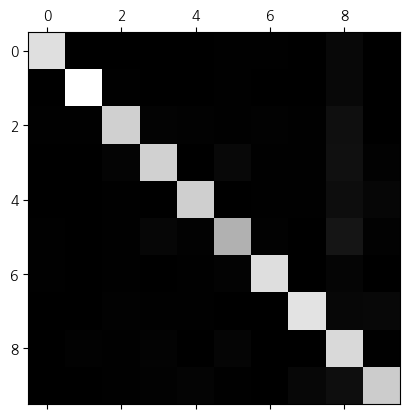

In [231]:
# 오차 행렬을 시각화
plt.matshow(conf_mx,cmap='gray')
plt.show()

In [232]:
# 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타낸다
# 대각선은 맞게 분류한 수
# 주대각선이 밝으므로 대부분의 이미지가 올바르게 분류 되었다.
# 주대각선의 5부분은 다른 부위에 비해 가장 어둡다.
# 1. 숫자 5의 이미지가 적다
# 2. 숫자 5를 다른 숫자만큼 잘 분류 하지 못한다.

In [233]:
# 비율로 오차행렬을 구해서 시각화